#Fetching temperature data and displaying it on a map

This example demonstrates using MesoPy to download data from the MesoWest data repository to display on a map.

**External libraries used:**
+ MesoPy
+ matplotlib
+ cartopy

### Example


First we import the Meso object from MesoPy to make our data request, pass in an API token, and request air temperature values in the last 90 minutes at the stations below.

In [4]:
from MesoPy import Meso

# Pass in a token to the meso object to validate against the API. Please use your own (see README for details)!
m = Meso(api_token='3428e1e281164762870915d2ae6781b4')

# Use to lookup stations, could specify counties or whatever here
# findstationids = m.station_list(state='CO')
# print(findstationids)

# Grab most recent temp (F) ob in last 90 min at each of the below stations
stations = ['kgxy, kccu, kcos, kden, kgjt, kbdu, kpub, klhx, kspd, kdro, ksbs, keeo, kguc, klic, '
            'kstk, kals, ktad']
latest = m.latest_obs(stid=stations, within='90', vars='air_temp', units='temp|F')

# Print latest to the notebook
latest

{u'STATION': [{u'ELEVATION': u'7536',
   u'ID': u'89',
   u'LATITUDE': u'37.43933',
   u'LONGITUDE': u'-105.86180',
   u'MNET_ID': u'1',
   u'NAME': u'San Luis Valley Regional Airport',
   u'OBSERVATIONS': {u'air_temp_value_1': {u'date_time': u'2015-07-09T16:52:00Z',
     u'value': u'64.94'}},
   u'SENSOR_VARIABLES': {u'air_temp': {u'air_temp_value_1': {u'position': u'2'}}},
   u'STATE': u'CO',
   u'STATUS': u'ACTIVE',
   u'STID': u'KALS',
   u'TIMEZONE': u'US/Mountain'},
  {u'ELEVATION': u'6181',
   u'ID': u'140',
   u'LATITUDE': u'38.80948',
   u'LONGITUDE': u'-104.68872',
   u'MNET_ID': u'1',
   u'NAME': u'City Of Colorado Springs Municipal Airport',
   u'OBSERVATIONS': {u'air_temp_value_1': {u'date_time': u'2015-07-09T16:54:00Z',
     u'value': u'64.04'}},
   u'SENSOR_VARIABLES': {u'air_temp': {u'air_temp_value_1': {u'position': u'2'}}},
   u'STATE': u'CO',
   u'STATUS': u'ACTIVE',
   u'STID': u'KCOS',
   u'TIMEZONE': u'US/Mountain'},
  {u'ELEVATION': u'5404',
   u'ID': u'153',
   

As you can see from the above, this returns a lot of metadata as well as the temperature data we requested. Now we can pull out only the data we want and create a nice list to store everything for iterating over later. 

In [5]:
data = []
[data.append((float(ob['LATITUDE']), float(ob['LONGITUDE']), float(ob['OBSERVATIONS']['air_temp_value_1']['value']),
          ob['STID'])) for ob in latest['STATION']]

# Print the data list to the notebook
data

[(37.43933, -105.8618, 64.94, u'KALS'),
 (38.80948, -104.68872, 64.04, u'KCOS'),
 (39.84658, -104.65622, 71.06, u'KDEN'),
 (37.14312, -107.76023, 68.0, u'KDRO'),
 (40.0444, -107.88832, 69.08, u'KEEO'),
 (39.13389, -108.53861, 69.98, u'KGJT'),
 (38.53333, -106.93333, 62.6, u'KGUC'),
 (40.43333, -104.63333, 64.4, u'KGXY'),
 (38.04949, -103.51334, 69.98, u'KLHX'),
 (39.27334, -103.66738, 64.94, u'KLIC'),
 (38.29, -104.49833, 71.96, u'KPUB'),
 (40.5153, -106.86767, 64.4, u'KSBS'),
 (37.28333, -102.61667, 62.96, u'KSPD'),
 (37.26218, -104.33184, 66.92, u'KTAD'),
 (39.47523, -106.15228, 48.2, u'KCCU'),
 (40.0394297, -105.2258217, 64.4, u'KBDU'),
 (40.61331, -103.26109, 64.4, u'KSTK')]

Now we can display this information on our map! I wanted a terrain map to show why temperature values would be so dramatically different in Colorado so I am choosing to pull map tiles from the Mapquest server. We set up our figure, draw the points for the stations, apply a transformation so that the text displays next to the lat/long points, and then plot the text. 

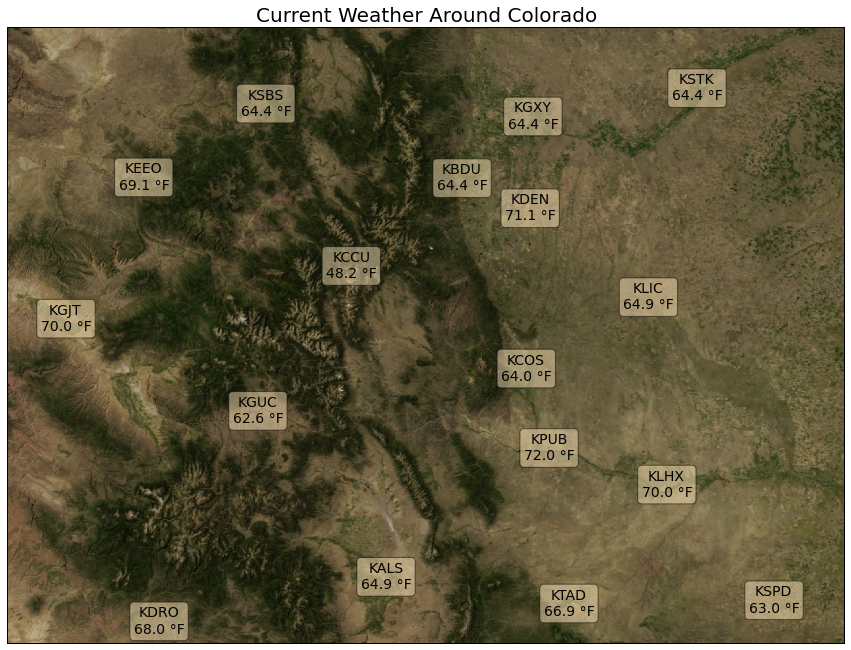

In [11]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
%matplotlib inline

fig = plt.figure(figsize=(15, 12))
# Create a MapQuest open aerial instance.
map_quest_aerial = cimgt.MapQuestOpenAerial()
# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=map_quest_aerial.crs)
# Limit the extent of the map to Colorado's borders
ax.set_extent([-102.03, -109.03, 37, 41])
# Add the MapQuest data at zoom level 8.
ax.add_image(map_quest_aerial, 8)

# Plot lat/long pts with below params
for lat, lon, temp, stid in data:
    plt.plot(lon, lat, marker='o', color='y', markersize=1,
             alpha=0.7, transform=ccrs.Geodetic())
    
# Transforms for the text func we're about to call
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=0, y=0)

# Plot temp and station id for each of the markers
for lat, lon, temp, stid in data:
    plt.text(lon, lat, stid + '\n' + str(round(temp, 1)) + u' \N{DEGREE SIGN}' + 'F',
             verticalalignment='center', horizontalalignment='center',
             transform=text_transform, fontsize=14,
             bbox=dict(facecolor='wheat', alpha=0.5, boxstyle='round'))
plt.title('Current Weather Around Colorado', fontsize=20)